# Cards Model Test

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from jass.train.label_play import LabelPlay
from jass.logs.game_log_entry import GameLogEntry
from jass.game.game_state_util import state_from_complete_game, calculate_starting_hands_from_game
from jass.game.rule_schieber import RuleSchieber
from examples.io.convert_swisslos_log_to_games import LogParserSwisslos

In [2]:
cards = [
# Diamonds
'DA','DK','DQ','DJ','D10','D9','D8','D7','D6',
# Hearts
'HA','HK','HQ','HJ','H10','H9','H8','H7','H6',
# Spades
'SA','SK','SQ','SJ','S10','S9','S8','S7','S6',
# Clubs
'CA','CK','CQ','CJ','C10','C9','C8','C7','C6'
]

trick_cards = [

't_DA','t_DK','t_DQ','t_DJ','t_D10','t_D9','t_D8','t_D7','t_D6',# Diamonds
't_HA','t_HK','t_HQ','t_HJ','t_H10','t_H9','t_H8','t_H7','t_H6',# Hearts
't_SA','t_SK','t_SQ','t_SJ','t_S10','t_S9','t_S8','t_S7','t_S6',# Spades
't_CA','t_CK','t_CQ','t_CJ','t_C10','t_C9','t_C8','t_C7','t_C6'# Clubs
]

user  = ['user']
trump = ['trump']
played_card  = ['played_card']

rule = RuleSchieber()

entries = []
path = Path("jass-games") / "jass_game_0001.txt"
with open(path) as file:
    line = file.readline()
    #while line:
    for x in range(100000):
        content = json.loads(line)
        entry = GameLogEntry.from_json(content)
        entries.append(entry)
        line = file.readline()

#entries = LogParserSwisslos.parse_rounds(path)

rows = []

for entry in entries:
    for nrCards in range(0,34):
        # VALID CARDS [36]
        round_state = state_from_complete_game(entry.game, nrCards)
        valid_cards = rule.get_valid_cards_from_state(round_state)# valid cards for player
        row = valid_cards
        
        # TRUMP [1]
        row = np.append(row, round_state.trump)
        
        # PLAYED CARD [1]
        next_round_state = state_from_complete_game(entry.game, nrCards + 1)
        #print(round_state.current_trick)
        #print(next_round_state.tricks[round_state.nr_tricks])
        card = np.setdiff1d(next_round_state.tricks[round_state.nr_tricks], round_state.current_trick)
        #print(card)
        row = np.append(row,card[0])
        
        # CURRENT TRICK [36] where 0-3 elements = 1, rest = 
        current_trick_cards = np.zeros(36, dtype=int)
        current_trick = round_state.current_trick[0:3]
        current_trick = np.delete(current_trick, np.where(current_trick == -1))
        #print(current_trick)
        current_trick_cards[current_trick] = 1
        #print(current_trick_cards)
        row = np.append(row, current_trick_cards)
        rows.append(row)

data =pd.DataFrame(data=rows ,columns=cards + trump + played_card + trick_cards)

pd.set_option('display.max_columns', None)
data.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,HK,HQ,HJ,H10,H9,H8,H7,H6,SA,SK,SQ,SJ,S10,S9,S8,S7,S6,CA,CK,CQ,CJ,C10,C9,C8,C7,C6,trump,played_card,t_DA,t_DK,t_DQ,t_DJ,t_D10,t_D9,t_D8,t_D7,t_D6,t_HA,t_HK,t_HQ,t_HJ,t_H10,t_H9,t_H8,t_H7,t_H6,t_SA,t_SK,t_SQ,t_SJ,t_S10,t_S9,t_S8,t_S7,t_S6,t_CA,t_CK,t_CQ,t_CJ,t_C10,t_C9,t_C8,t_C7,t_C6
0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,4,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## import player statistics

In [3]:
#stats = pd.read_json("04 Data/stat/player_all_stat.json")
#stats.head()

In [4]:
#stats.sort_values(by=['mean'], ascending=False)

# Drop bad players

In [5]:
#good_users = stats.loc[(stats['mean'] > 79) & (stats['nr'] > 5)]
#good_users

In [6]:
#data = data[data['user'].isin(good_users['id'])]
#data

# Training

In [7]:
from sklearn.model_selection import train_test_split
feature_columns = trick_cards


In [8]:
x_data = data[cards + trump + feature_columns]
y_data = data.played_card

In [9]:
X_train, X_test, y_train_data, y_test_data = train_test_split(x_data, y_data, test_size=0.2, stratify=data.played_card, random_state=42)

print(y_train_data)
#y_train_label = np.argmax(x_train, axis=1)
#y_categorical = tf.keras.utils.to_categorical(y_train_label, num_classes=4)

3393256    23
466310     17
1259946    35
902183     14
1708682     8
           ..
550591     10
2542959    17
2898611     5
1825374    17
201623     30
Name: played_card, Length: 2720000, dtype: int64


In [10]:
y_train = pd.get_dummies(y_train_data)
y_test = pd.get_dummies(y_test_data)
print(y_train)

         0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  \
3393256   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
466310    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1259946   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
902183    0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   
1708682   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
550591    0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
2542959   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2898611   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
1825374   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
201623    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

         17  18  19  20  21  22  23  24  25  26  27

In [12]:
input_length = len(cards + trump + feature_columns)

def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(input_length, activation='relu', input_shape=[input_length]))
    model.add(keras.layers.Dense(120, activation='relu'))
    model.add(keras.layers.Dense(120, activation='relu'))
    model.add(keras.layers.Dense(54, activation='relu'))
    model.add(keras.layers.Dense(54, activation='relu'))
    model.add(keras.layers.Dense(40, activation='relu'))
    model.add(keras.layers.Dense(40, activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(36, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    return model

model_ckpt= create_model()

checkpoint_path = "train_ckpt/cp.ckpt"

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_weights_only=True, save_freq=102000)



history = model_ckpt.fit(X_train, y_train, validation_split=0.25, epochs=800, batch_size=1000, callbacks=[cp_callback])

Epoch 1/800
2040/2040 [==============================] - 5s 2ms/step - loss: 3.5736 - accuracy: 0.0384 - val_loss: 3.5524 - val_accuracy: 0.0753
Epoch 2/800
2040/2040 [==============================] - 4s 2ms/step - loss: 3.4803 - accuracy: 0.0701 - val_loss: 3.2643 - val_accuracy: 0.1823
Epoch 3/800
2040/2040 [==============================] - 5s 2ms/step - loss: 3.0656 - accuracy: 0.1755 - val_loss: 2.5209 - val_accuracy: 0.3801
Epoch 4/800
2040/2040 [==============================] - 5s 2ms/step - loss: 2.6139 - accuracy: 0.2743 - val_loss: 2.0825 - val_accuracy: 0.4202
Epoch 5/800
2040/2040 [==============================] - 5s 2ms/step - loss: 2.3565 - accuracy: 0.3236 - val_loss: 1.9057 - val_accuracy: 0.4382
Epoch 6/800
2040/2040 [==============================] - 5s 2ms/step - loss: 2.2246 - accuracy: 0.3483 - val_loss: 1.8188 - val_accuracy: 0.4497
Epoch 7/800
2040/2040 [==============================] - 4s 2ms/step - loss: 2.1431 - accuracy: 0.3636 - val_loss: 1.7610 - val_ac

2040/2040 [==============================] - 5s 2ms/step - loss: 1.6863 - accuracy: 0.4497 - val_loss: 1.4038 - val_accuracy: 0.5183
Epoch 57/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.6841 - accuracy: 0.4502 - val_loss: 1.4039 - val_accuracy: 0.5166
Epoch 58/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.6829 - accuracy: 0.4503 - val_loss: 1.4044 - val_accuracy: 0.5173
Epoch 59/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.6800 - accuracy: 0.4510 - val_loss: 1.3982 - val_accuracy: 0.5191
Epoch 60/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.6784 - accuracy: 0.4514 - val_loss: 1.3953 - val_accuracy: 0.5196
Epoch 61/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.6762 - accuracy: 0.4520 - val_loss: 1.3972 - val_accuracy: 0.5187
Epoch 62/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.6750 - accuracy: 0.4522 - val_loss: 1.3978 - val_accuracy

2040/2040 [==============================] - 4s 2ms/step - loss: 1.6009 - accuracy: 0.4684 - val_loss: 1.3291 - val_accuracy: 0.5346
Epoch 112/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.5998 - accuracy: 0.4686 - val_loss: 1.3258 - val_accuracy: 0.5349
Epoch 113/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.5986 - accuracy: 0.4694 - val_loss: 1.3289 - val_accuracy: 0.5341
Epoch 114/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.5979 - accuracy: 0.4691 - val_loss: 1.3246 - val_accuracy: 0.5357
Epoch 115/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.5966 - accuracy: 0.4697 - val_loss: 1.3250 - val_accuracy: 0.5365
Epoch 116/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.5956 - accuracy: 0.4699 - val_loss: 1.3261 - val_accuracy: 0.5346
Epoch 117/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.5948 - accuracy: 0.4698 - val_loss: 1.3193 - val_ac

Epoch 166/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.5512 - accuracy: 0.4783 - val_loss: 1.2778 - val_accuracy: 0.5450
Epoch 167/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.5507 - accuracy: 0.4786 - val_loss: 1.2740 - val_accuracy: 0.5456
Epoch 168/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.5498 - accuracy: 0.4785 - val_loss: 1.2814 - val_accuracy: 0.5427
Epoch 169/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.5494 - accuracy: 0.4785 - val_loss: 1.2737 - val_accuracy: 0.5434
Epoch 170/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.5479 - accuracy: 0.4788 - val_loss: 1.2779 - val_accuracy: 0.5437
Epoch 171/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.5480 - accuracy: 0.4790 - val_loss: 1.2754 - val_accuracy: 0.5445
Epoch 172/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.5471 - accuracy: 0.4788 - val_loss: 1

Epoch 221/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.5066 - accuracy: 0.4874 - val_loss: 1.2362 - val_accuracy: 0.5515
Epoch 222/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.5067 - accuracy: 0.4873 - val_loss: 1.2353 - val_accuracy: 0.5510
Epoch 223/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.5056 - accuracy: 0.4878 - val_loss: 1.2372 - val_accuracy: 0.5506
Epoch 224/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.5045 - accuracy: 0.4879 - val_loss: 1.2381 - val_accuracy: 0.5508
Epoch 225/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.5037 - accuracy: 0.4881 - val_loss: 1.2389 - val_accuracy: 0.5494
Epoch 226/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.5035 - accuracy: 0.4882 - val_loss: 1.2355 - val_accuracy: 0.5514
Epoch 227/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.5021 - accuracy: 0.4886 - val_loss: 1

Epoch 276/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.4747 - accuracy: 0.4940 - val_loss: 1.2058 - val_accuracy: 0.5560
Epoch 277/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.4743 - accuracy: 0.4940 - val_loss: 1.2038 - val_accuracy: 0.5568
Epoch 278/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.4733 - accuracy: 0.4943 - val_loss: 1.2047 - val_accuracy: 0.5573
Epoch 279/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.4729 - accuracy: 0.4948 - val_loss: 1.2042 - val_accuracy: 0.5567
Epoch 280/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.4723 - accuracy: 0.4948 - val_loss: 1.2041 - val_accuracy: 0.5561
Epoch 281/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.4717 - accuracy: 0.4948 - val_loss: 1.2033 - val_accuracy: 0.5576
Epoch 282/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.4720 - accuracy: 0.4946 - val_loss: 1

Epoch 331/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.4398 - accuracy: 0.5009 - val_loss: 1.1708 - val_accuracy: 0.5645
Epoch 332/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.4399 - accuracy: 0.5011 - val_loss: 1.1720 - val_accuracy: 0.5653
Epoch 333/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.4387 - accuracy: 0.5016 - val_loss: 1.1689 - val_accuracy: 0.5649
Epoch 334/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.4385 - accuracy: 0.5015 - val_loss: 1.1676 - val_accuracy: 0.5665
Epoch 335/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.4377 - accuracy: 0.5014 - val_loss: 1.1666 - val_accuracy: 0.5658
Epoch 336/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.4377 - accuracy: 0.5016 - val_loss: 1.1676 - val_accuracy: 0.5664
Epoch 337/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.4372 - accuracy: 0.5015 - val_loss: 1

Epoch 386/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.4150 - accuracy: 0.5064 - val_loss: 1.1438 - val_accuracy: 0.5695
Epoch 387/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.4149 - accuracy: 0.5065 - val_loss: 1.1456 - val_accuracy: 0.5721
Epoch 388/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.4147 - accuracy: 0.5065 - val_loss: 1.1394 - val_accuracy: 0.5719
Epoch 389/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.4143 - accuracy: 0.5063 - val_loss: 1.1419 - val_accuracy: 0.5697
Epoch 390/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.4136 - accuracy: 0.5069 - val_loss: 1.1371 - val_accuracy: 0.5717
Epoch 391/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.4133 - accuracy: 0.5067 - val_loss: 1.1409 - val_accuracy: 0.5705
Epoch 392/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.4135 - accuracy: 0.5067 - val_loss: 1

Epoch 441/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3951 - accuracy: 0.5120 - val_loss: 1.1199 - val_accuracy: 0.5760
Epoch 442/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3956 - accuracy: 0.5117 - val_loss: 1.1227 - val_accuracy: 0.5770
Epoch 443/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3948 - accuracy: 0.5117 - val_loss: 1.1197 - val_accuracy: 0.5785
Epoch 444/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3944 - accuracy: 0.5120 - val_loss: 1.1155 - val_accuracy: 0.5787
Epoch 445/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3938 - accuracy: 0.5118 - val_loss: 1.1247 - val_accuracy: 0.5752
Epoch 446/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3932 - accuracy: 0.5125 - val_loss: 1.1157 - val_accuracy: 0.5781
Epoch 447/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3932 - accuracy: 0.5122 - val_loss: 1

Epoch 496/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3752 - accuracy: 0.5184 - val_loss: 1.1020 - val_accuracy: 0.5858
Epoch 497/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3751 - accuracy: 0.5182 - val_loss: 1.1037 - val_accuracy: 0.5829
Epoch 498/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3740 - accuracy: 0.5190 - val_loss: 1.1041 - val_accuracy: 0.5841
Epoch 499/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3741 - accuracy: 0.5186 - val_loss: 1.0993 - val_accuracy: 0.5833
Epoch 500/800
2032/2040 [============================>.] - ETA: 0s - loss: 1.3739 - accuracy: 0.5188
Epoch 00500: saving model to train_ckpt\cp.ckpt
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3739 - accuracy: 0.5188 - val_loss: 1.0997 - val_accuracy: 0.5836
Epoch 501/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3733 - accuracy: 0.5192 - val_loss: 1.0986 - val_

2040/2040 [==============================] - 4s 2ms/step - loss: 1.3588 - accuracy: 0.5235 - val_loss: 1.0823 - val_accuracy: 0.5906
Epoch 551/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3587 - accuracy: 0.5238 - val_loss: 1.0860 - val_accuracy: 0.5867
Epoch 552/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3580 - accuracy: 0.5240 - val_loss: 1.0796 - val_accuracy: 0.5908
Epoch 553/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3573 - accuracy: 0.5240 - val_loss: 1.0743 - val_accuracy: 0.5930
Epoch 554/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3583 - accuracy: 0.5240 - val_loss: 1.0804 - val_accuracy: 0.5905
Epoch 555/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3570 - accuracy: 0.5245 - val_loss: 1.0744 - val_accuracy: 0.5917
Epoch 556/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3568 - accuracy: 0.5242 - val_loss: 1.0735 - val_ac

Epoch 605/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3416 - accuracy: 0.5293 - val_loss: 1.0676 - val_accuracy: 0.5963
Epoch 606/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.3410 - accuracy: 0.5290 - val_loss: 1.0585 - val_accuracy: 0.5986
Epoch 607/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.3417 - accuracy: 0.5291 - val_loss: 1.0572 - val_accuracy: 0.6007
Epoch 608/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3401 - accuracy: 0.5296 - val_loss: 1.0554 - val_accuracy: 0.5994
Epoch 609/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3409 - accuracy: 0.5293 - val_loss: 1.0665 - val_accuracy: 0.5977
Epoch 610/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.3398 - accuracy: 0.5300 - val_loss: 1.0566 - val_accuracy: 0.5976
Epoch 611/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.3398 - accuracy: 0.5294 - val_loss: 1

Epoch 660/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3230 - accuracy: 0.5361 - val_loss: 1.0370 - val_accuracy: 0.6061
Epoch 661/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3220 - accuracy: 0.5361 - val_loss: 1.0443 - val_accuracy: 0.6056
Epoch 662/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3225 - accuracy: 0.5359 - val_loss: 1.0405 - val_accuracy: 0.6050
Epoch 663/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3215 - accuracy: 0.5365 - val_loss: 1.0369 - val_accuracy: 0.6067
Epoch 664/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3210 - accuracy: 0.5367 - val_loss: 1.0452 - val_accuracy: 0.6040
Epoch 665/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3213 - accuracy: 0.5366 - val_loss: 1.0337 - val_accuracy: 0.6091
Epoch 666/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.3210 - accuracy: 0.5368 - val_loss: 1

Epoch 715/800
2040/2040 [==============================] - 6s 3ms/step - loss: 1.3047 - accuracy: 0.5427 - val_loss: 1.0212 - val_accuracy: 0.6126
Epoch 716/800
2040/2040 [==============================] - 5s 3ms/step - loss: 1.3045 - accuracy: 0.5428 - val_loss: 1.0195 - val_accuracy: 0.6135
Epoch 717/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.3056 - accuracy: 0.5427 - val_loss: 1.0195 - val_accuracy: 0.6144
Epoch 718/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.3043 - accuracy: 0.5433 - val_loss: 1.0160 - val_accuracy: 0.6137
Epoch 719/800
2040/2040 [==============================] - 5s 3ms/step - loss: 1.3044 - accuracy: 0.5429 - val_loss: 1.0184 - val_accuracy: 0.6138
Epoch 720/800
2040/2040 [==============================] - 5s 3ms/step - loss: 1.3038 - accuracy: 0.5430 - val_loss: 1.0215 - val_accuracy: 0.6151
Epoch 721/800
2040/2040 [==============================] - 5s 3ms/step - loss: 1.3030 - accuracy: 0.5433 - val_loss: 1

Epoch 770/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.2907 - accuracy: 0.5479 - val_loss: 0.9999 - val_accuracy: 0.6209
Epoch 771/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.2897 - accuracy: 0.5481 - val_loss: 1.0069 - val_accuracy: 0.6157
Epoch 772/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2904 - accuracy: 0.5478 - val_loss: 1.0051 - val_accuracy: 0.6189
Epoch 773/800
2040/2040 [==============================] - 4s 2ms/step - loss: 1.2910 - accuracy: 0.5474 - val_loss: 1.0005 - val_accuracy: 0.6204
Epoch 774/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2903 - accuracy: 0.5480 - val_loss: 1.0070 - val_accuracy: 0.6170
Epoch 775/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2897 - accuracy: 0.5482 - val_loss: 1.0083 - val_accuracy: 0.6157
Epoch 776/800
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2895 - accuracy: 0.5484 - val_loss: 1

In [13]:
model_ckpt.evaluate(X_test, y_test)

21250/21250 [==============================] - 28s 1ms/step - loss: 1.0042 - accuracy: 0.6162


[1.0042147636413574, 0.6161853075027466]

Text(0, 0.5, 'loss')

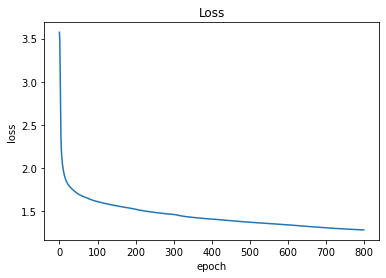

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')

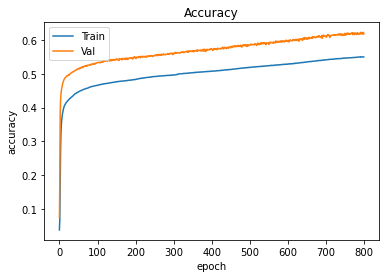

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

In [16]:
model_ckpt2 = create_model()
model_ckpt2.load_weights(checkpoint_path)

In [17]:
loss,acc = model_ckpt2.evaluate(X_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

21250/21250 [==============================] - 23s 1ms/step - loss: 1.0042 - accuracy: 0.6162
Restored model, accuracy: 61.62%


In [18]:
history = model_ckpt2.fit(X_train, y_train, validation_split=0.25, epochs=1200, batch_size=1000, callbacks=[cp_callback])

Epoch 1/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2839 - accuracy: 0.5503 - val_loss: 0.9995 - val_accuracy: 0.6197
Epoch 2/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.2837 - accuracy: 0.5501 - val_loss: 0.9915 - val_accuracy: 0.6228
Epoch 3/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2836 - accuracy: 0.5505 - val_loss: 0.9990 - val_accuracy: 0.6206
Epoch 4/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2834 - accuracy: 0.5504 - val_loss: 0.9938 - val_accuracy: 0.6209
Epoch 5/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.2838 - accuracy: 0.5498 - val_loss: 0.9947 - val_accuracy: 0.6214
Epoch 6/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2826 - accuracy: 0.5505 - val_loss: 0.9938 - val_accuracy: 0.6218
Epoch 7/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2824 - accuracy: 0.5505 - val_loss: 0.9961 -

Epoch 56/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2623 - accuracy: 0.5566 - val_loss: 0.9824 - val_accuracy: 0.6238
Epoch 57/1200
2040/2040 [==============================] - 5s 3ms/step - loss: 1.2622 - accuracy: 0.5567 - val_loss: 0.9808 - val_accuracy: 0.6250
Epoch 58/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2624 - accuracy: 0.5561 - val_loss: 0.9840 - val_accuracy: 0.6224
Epoch 59/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.2618 - accuracy: 0.5567 - val_loss: 0.9859 - val_accuracy: 0.6220
Epoch 60/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.2614 - accuracy: 0.5566 - val_loss: 0.9793 - val_accuracy: 0.6248
Epoch 61/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2615 - accuracy: 0.5565 - val_loss: 0.9785 - val_accuracy: 0.6264
Epoch 62/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2606 - accuracy: 0.5565 - val_loss: 0

Epoch 111/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.2518 - accuracy: 0.5595 - val_loss: 0.9693 - val_accuracy: 0.6268
Epoch 112/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.2507 - accuracy: 0.5599 - val_loss: 0.9675 - val_accuracy: 0.6282
Epoch 113/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2512 - accuracy: 0.5595 - val_loss: 0.9684 - val_accuracy: 0.6289
Epoch 114/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2506 - accuracy: 0.5597 - val_loss: 0.9748 - val_accuracy: 0.6272
Epoch 115/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.2508 - accuracy: 0.5596 - val_loss: 0.9726 - val_accuracy: 0.6265
Epoch 116/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2498 - accuracy: 0.5600 - val_loss: 0.9742 - val_accuracy: 0.6256
Epoch 117/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.2501 - accuracy: 0.5593 - val_

2040/2040 [==============================] - 4s 2ms/step - loss: 1.2405 - accuracy: 0.5621 - val_loss: 0.9591 - val_accuracy: 0.6298
Epoch 166/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2415 - accuracy: 0.5617 - val_loss: 0.9581 - val_accuracy: 0.6311
Epoch 167/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2399 - accuracy: 0.5619 - val_loss: 0.9618 - val_accuracy: 0.6283
Epoch 168/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2399 - accuracy: 0.5623 - val_loss: 0.9600 - val_accuracy: 0.6325
Epoch 169/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2399 - accuracy: 0.5622 - val_loss: 0.9597 - val_accuracy: 0.6307
Epoch 170/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2392 - accuracy: 0.5627 - val_loss: 0.9610 - val_accuracy: 0.6283
Epoch 171/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2399 - accuracy: 0.5620 - val_loss: 0.9632 - 

2040/2040 [==============================] - 4s 2ms/step - loss: 1.2296 - accuracy: 0.5647 - val_loss: 0.9526 - val_accuracy: 0.6331
Epoch 220/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2302 - accuracy: 0.5645 - val_loss: 0.9511 - val_accuracy: 0.6347
Epoch 221/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2298 - accuracy: 0.5649 - val_loss: 0.9512 - val_accuracy: 0.6321
Epoch 222/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2301 - accuracy: 0.5644 - val_loss: 0.9545 - val_accuracy: 0.6303
Epoch 223/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2299 - accuracy: 0.5646 - val_loss: 0.9519 - val_accuracy: 0.6314
Epoch 224/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2291 - accuracy: 0.5649 - val_loss: 0.9507 - val_accuracy: 0.6321
Epoch 225/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.2293 - accuracy: 0.5648 - val_loss: 0.9553 - 

2040/2040 [==============================] - 5s 2ms/step - loss: 1.2196 - accuracy: 0.5671 - val_loss: 0.9421 - val_accuracy: 0.6364
Epoch 274/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2202 - accuracy: 0.5667 - val_loss: 0.9445 - val_accuracy: 0.6350
Epoch 275/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2198 - accuracy: 0.5672 - val_loss: 0.9389 - val_accuracy: 0.6369
Epoch 276/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2196 - accuracy: 0.5670 - val_loss: 0.9422 - val_accuracy: 0.6350
Epoch 277/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2192 - accuracy: 0.5674 - val_loss: 0.9434 - val_accuracy: 0.6343
Epoch 278/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2192 - accuracy: 0.5672 - val_loss: 0.9469 - val_accuracy: 0.6324
Epoch 279/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2196 - accuracy: 0.5674 - val_loss: 0.9421 - 

2040/2040 [==============================] - 4s 2ms/step - loss: 1.2111 - accuracy: 0.5689 - val_loss: 0.9332 - val_accuracy: 0.6350
Epoch 328/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.2107 - accuracy: 0.5697 - val_loss: 0.9294 - val_accuracy: 0.6375
Epoch 329/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2110 - accuracy: 0.5697 - val_loss: 0.9372 - val_accuracy: 0.6367
Epoch 330/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2106 - accuracy: 0.5695 - val_loss: 0.9355 - val_accuracy: 0.6382
Epoch 331/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.2103 - accuracy: 0.5697 - val_loss: 0.9358 - val_accuracy: 0.6355
Epoch 332/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.2105 - accuracy: 0.5696 - val_loss: 0.9353 - val_accuracy: 0.6341
Epoch 333/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.2104 - accuracy: 0.5698 - val_loss: 0.9322 - 

2040/2040 [==============================] - 4s 2ms/step - loss: 1.1918 - accuracy: 0.5756 - val_loss: 0.9263 - val_accuracy: 0.6372
Epoch 382/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1920 - accuracy: 0.5756 - val_loss: 0.9215 - val_accuracy: 0.6411
Epoch 383/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1916 - accuracy: 0.5757 - val_loss: 0.9253 - val_accuracy: 0.6390
Epoch 384/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1916 - accuracy: 0.5756 - val_loss: 0.9198 - val_accuracy: 0.6400
Epoch 385/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1916 - accuracy: 0.5761 - val_loss: 0.9201 - val_accuracy: 0.6418
Epoch 386/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1914 - accuracy: 0.5759 - val_loss: 0.9271 - val_accuracy: 0.6355
Epoch 387/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1913 - accuracy: 0.5759 - val_loss: 0.9268 - 

2040/2040 [==============================] - 5s 2ms/step - loss: 1.1824 - accuracy: 0.5783 - val_loss: 0.9146 - val_accuracy: 0.6453
Epoch 436/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1825 - accuracy: 0.5785 - val_loss: 0.9109 - val_accuracy: 0.6429
Epoch 437/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1824 - accuracy: 0.5782 - val_loss: 0.9146 - val_accuracy: 0.6425
Epoch 438/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1814 - accuracy: 0.5783 - val_loss: 0.9125 - val_accuracy: 0.6424
Epoch 439/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1820 - accuracy: 0.5786 - val_loss: 0.9149 - val_accuracy: 0.6406
Epoch 440/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1819 - accuracy: 0.5784 - val_loss: 0.9147 - val_accuracy: 0.6397
Epoch 441/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1815 - accuracy: 0.5784 - val_loss: 0.9179 - 

2040/2040 [==============================] - 5s 2ms/step - loss: 1.1738 - accuracy: 0.5807 - val_loss: 0.9068 - val_accuracy: 0.6433
Epoch 490/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1732 - accuracy: 0.5809 - val_loss: 0.9111 - val_accuracy: 0.6417
Epoch 491/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1735 - accuracy: 0.5808 - val_loss: 0.9036 - val_accuracy: 0.6441
Epoch 492/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1735 - accuracy: 0.5810 - val_loss: 0.9068 - val_accuracy: 0.6445
Epoch 493/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1733 - accuracy: 0.5809 - val_loss: 0.9055 - val_accuracy: 0.6434
Epoch 494/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1730 - accuracy: 0.5808 - val_loss: 0.9114 - val_accuracy: 0.6402
Epoch 495/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1724 - accuracy: 0.5812 - val_loss: 0.9087 - 

2040/2040 [==============================] - 5s 2ms/step - loss: 1.1657 - accuracy: 0.5821 - val_loss: 0.8994 - val_accuracy: 0.6453
Epoch 544/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1650 - accuracy: 0.5827 - val_loss: 0.9061 - val_accuracy: 0.6438
Epoch 545/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1658 - accuracy: 0.5820 - val_loss: 0.9021 - val_accuracy: 0.6440
Epoch 546/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1655 - accuracy: 0.5821 - val_loss: 0.9031 - val_accuracy: 0.6433
Epoch 547/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1652 - accuracy: 0.5827 - val_loss: 0.9043 - val_accuracy: 0.6418
Epoch 548/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1657 - accuracy: 0.5823 - val_loss: 0.9003 - val_accuracy: 0.6451
Epoch 549/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1650 - accuracy: 0.5828 - val_loss: 0.9014 - 

2040/2040 [==============================] - 4s 2ms/step - loss: 1.1591 - accuracy: 0.5837 - val_loss: 0.8945 - val_accuracy: 0.6470
Epoch 598/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1576 - accuracy: 0.5847 - val_loss: 0.8931 - val_accuracy: 0.6472
Epoch 599/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1583 - accuracy: 0.5842 - val_loss: 0.8936 - val_accuracy: 0.6466
Epoch 600/1200
2032/2040 [============================>.] - ETA: 0s - loss: 1.1579 - accuracy: 0.5845
Epoch 00600: saving model to train_ckpt\cp.ckpt
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1578 - accuracy: 0.5845 - val_loss: 0.8974 - val_accuracy: 0.6465
Epoch 601/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1581 - accuracy: 0.5844 - val_loss: 0.8949 - val_accuracy: 0.6462
Epoch 602/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1577 - accuracy: 0.5844 - val_loss: 0.8935 - val_accuracy:

2040/2040 [==============================] - 5s 2ms/step - loss: 1.1511 - accuracy: 0.5855 - val_loss: 0.8858 - val_accuracy: 0.6493
Epoch 651/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1512 - accuracy: 0.5860 - val_loss: 0.8894 - val_accuracy: 0.6488
Epoch 652/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1509 - accuracy: 0.5864 - val_loss: 0.8883 - val_accuracy: 0.6482
Epoch 653/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1510 - accuracy: 0.5860 - val_loss: 0.8953 - val_accuracy: 0.6447
Epoch 654/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1510 - accuracy: 0.5863 - val_loss: 0.8912 - val_accuracy: 0.6479
Epoch 655/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1503 - accuracy: 0.5863 - val_loss: 0.8908 - val_accuracy: 0.6491
Epoch 656/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1499 - accuracy: 0.5867 - val_loss: 0.8871 - 

2040/2040 [==============================] - 5s 2ms/step - loss: 1.1477 - accuracy: 0.5870 - val_loss: 0.8814 - val_accuracy: 0.6517
Epoch 705/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1447 - accuracy: 0.5873 - val_loss: 0.8816 - val_accuracy: 0.6541
Epoch 706/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1441 - accuracy: 0.5882 - val_loss: 0.8829 - val_accuracy: 0.6502
Epoch 707/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1453 - accuracy: 0.5877 - val_loss: 0.8841 - val_accuracy: 0.6496
Epoch 708/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1449 - accuracy: 0.5878 - val_loss: 0.8844 - val_accuracy: 0.6534
Epoch 709/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1444 - accuracy: 0.5877 - val_loss: 0.8937 - val_accuracy: 0.6427
Epoch 710/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1449 - accuracy: 0.5873 - val_loss: 0.8850 - 

2040/2040 [==============================] - 4s 2ms/step - loss: 1.1402 - accuracy: 0.5893 - val_loss: 0.8756 - val_accuracy: 0.6519
Epoch 759/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1395 - accuracy: 0.5893 - val_loss: 0.8795 - val_accuracy: 0.6500
Epoch 760/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1390 - accuracy: 0.5893 - val_loss: 0.8836 - val_accuracy: 0.6481
Epoch 761/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1395 - accuracy: 0.5891 - val_loss: 0.8816 - val_accuracy: 0.6475
Epoch 762/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1397 - accuracy: 0.5894 - val_loss: 0.8778 - val_accuracy: 0.6532
Epoch 763/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1392 - accuracy: 0.5895 - val_loss: 0.8819 - val_accuracy: 0.6500
Epoch 764/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1395 - accuracy: 0.5890 - val_loss: 0.8830 - 

2040/2040 [==============================] - 4s 2ms/step - loss: 1.1345 - accuracy: 0.5901 - val_loss: 0.8753 - val_accuracy: 0.6513
Epoch 813/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1343 - accuracy: 0.5902 - val_loss: 0.8733 - val_accuracy: 0.6558
Epoch 814/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1339 - accuracy: 0.5904 - val_loss: 0.8759 - val_accuracy: 0.6493
Epoch 815/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1340 - accuracy: 0.5905 - val_loss: 0.8782 - val_accuracy: 0.6508
Epoch 816/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1338 - accuracy: 0.5906 - val_loss: 0.8721 - val_accuracy: 0.6541
Epoch 817/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1341 - accuracy: 0.5905 - val_loss: 0.8803 - val_accuracy: 0.6484
Epoch 818/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1342 - accuracy: 0.5904 - val_loss: 0.8741 - 

2040/2040 [==============================] - 4s 2ms/step - loss: 1.1296 - accuracy: 0.5915 - val_loss: 0.8782 - val_accuracy: 0.6493
Epoch 867/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1297 - accuracy: 0.5912 - val_loss: 0.8705 - val_accuracy: 0.6533
Epoch 868/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1291 - accuracy: 0.5916 - val_loss: 0.8727 - val_accuracy: 0.6526
Epoch 869/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1300 - accuracy: 0.5917 - val_loss: 0.8711 - val_accuracy: 0.6549
Epoch 870/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1309 - accuracy: 0.5914 - val_loss: 0.8748 - val_accuracy: 0.6539
Epoch 871/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1296 - accuracy: 0.5917 - val_loss: 0.8717 - val_accuracy: 0.6554
Epoch 872/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1304 - accuracy: 0.5914 - val_loss: 0.8701 - 

2040/2040 [==============================] - 4s 2ms/step - loss: 1.1259 - accuracy: 0.5926 - val_loss: 0.8712 - val_accuracy: 0.6510
Epoch 921/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1261 - accuracy: 0.5924 - val_loss: 0.8691 - val_accuracy: 0.6561
Epoch 922/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1259 - accuracy: 0.5927 - val_loss: 0.8733 - val_accuracy: 0.6488
Epoch 923/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1251 - accuracy: 0.5923 - val_loss: 0.8665 - val_accuracy: 0.6551
Epoch 924/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1256 - accuracy: 0.5924 - val_loss: 0.8724 - val_accuracy: 0.6503
Epoch 925/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1251 - accuracy: 0.5925 - val_loss: 0.8705 - val_accuracy: 0.6561
Epoch 926/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1257 - accuracy: 0.5924 - val_loss: 0.8658 - 

2040/2040 [==============================] - 4s 2ms/step - loss: 1.1218 - accuracy: 0.5937 - val_loss: 0.8667 - val_accuracy: 0.6537
Epoch 975/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1219 - accuracy: 0.5935 - val_loss: 0.8653 - val_accuracy: 0.6574
Epoch 976/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1220 - accuracy: 0.5932 - val_loss: 0.8671 - val_accuracy: 0.6534
Epoch 977/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1221 - accuracy: 0.5938 - val_loss: 0.8689 - val_accuracy: 0.6547
Epoch 978/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1226 - accuracy: 0.5931 - val_loss: 0.8648 - val_accuracy: 0.6563
Epoch 979/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1215 - accuracy: 0.5934 - val_loss: 0.8718 - val_accuracy: 0.6549
Epoch 980/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1209 - accuracy: 0.5937 - val_loss: 0.8666 - 

2040/2040 [==============================] - 5s 2ms/step - loss: 1.1181 - accuracy: 0.5940 - val_loss: 0.8626 - val_accuracy: 0.6554
Epoch 1029/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1180 - accuracy: 0.5941 - val_loss: 0.8625 - val_accuracy: 0.6550
Epoch 1030/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1182 - accuracy: 0.5939 - val_loss: 0.8649 - val_accuracy: 0.6550
Epoch 1031/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1179 - accuracy: 0.5941 - val_loss: 0.8615 - val_accuracy: 0.6562
Epoch 1032/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1179 - accuracy: 0.5946 - val_loss: 0.8637 - val_accuracy: 0.6551
Epoch 1033/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1178 - accuracy: 0.5945 - val_loss: 0.8615 - val_accuracy: 0.6574
Epoch 1034/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1177 - accuracy: 0.5943 - val_loss: 0.8

2040/2040 [==============================] - 4s 2ms/step - loss: 1.1152 - accuracy: 0.5950 - val_loss: 0.8640 - val_accuracy: 0.6538
Epoch 1083/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1151 - accuracy: 0.5951 - val_loss: 0.8634 - val_accuracy: 0.6551
Epoch 1084/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1153 - accuracy: 0.5949 - val_loss: 0.8614 - val_accuracy: 0.6554
Epoch 1085/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1157 - accuracy: 0.5949 - val_loss: 0.8615 - val_accuracy: 0.6575
Epoch 1086/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1156 - accuracy: 0.5946 - val_loss: 0.8591 - val_accuracy: 0.6549
Epoch 1087/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1152 - accuracy: 0.5952 - val_loss: 0.8633 - val_accuracy: 0.6612
Epoch 1088/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1146 - accuracy: 0.5951 - val_loss: 0.8

2040/2040 [==============================] - 4s 2ms/step - loss: 1.1127 - accuracy: 0.5957 - val_loss: 0.8609 - val_accuracy: 0.6560
Epoch 1137/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1118 - accuracy: 0.5957 - val_loss: 0.8630 - val_accuracy: 0.6539
Epoch 1138/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1120 - accuracy: 0.5957 - val_loss: 0.8581 - val_accuracy: 0.6588
Epoch 1139/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1119 - accuracy: 0.5962 - val_loss: 0.8593 - val_accuracy: 0.6588
Epoch 1140/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1118 - accuracy: 0.5961 - val_loss: 0.8621 - val_accuracy: 0.6557
Epoch 1141/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1123 - accuracy: 0.5955 - val_loss: 0.8567 - val_accuracy: 0.6604
Epoch 1142/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1122 - accuracy: 0.5958 - val_loss: 0.8

2040/2040 [==============================] - 4s 2ms/step - loss: 1.1094 - accuracy: 0.5963 - val_loss: 0.8597 - val_accuracy: 0.6584
Epoch 1191/1200
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1092 - accuracy: 0.5967 - val_loss: 0.8547 - val_accuracy: 0.6602
Epoch 1192/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1095 - accuracy: 0.5965 - val_loss: 0.8574 - val_accuracy: 0.6573
Epoch 1193/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1091 - accuracy: 0.5964 - val_loss: 0.8576 - val_accuracy: 0.6563
Epoch 1194/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1093 - accuracy: 0.5966 - val_loss: 0.8574 - val_accuracy: 0.6572
Epoch 1195/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1088 - accuracy: 0.5971 - val_loss: 0.8561 - val_accuracy: 0.6591
Epoch 1196/1200
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1083 - accuracy: 0.5968 - val_loss: 0.8

In [19]:
model_ckpt2.evaluate(X_test, y_test)

21250/21250 [==============================] - 24s 1ms/step - loss: 0.8637 - accuracy: 0.6528


[0.8636948466300964, 0.6527514457702637]

Text(0, 0.5, 'loss')

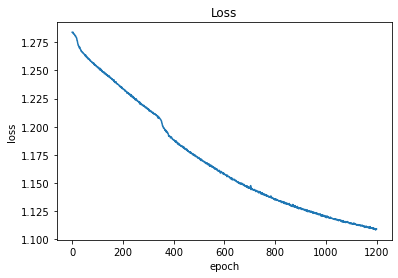

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')

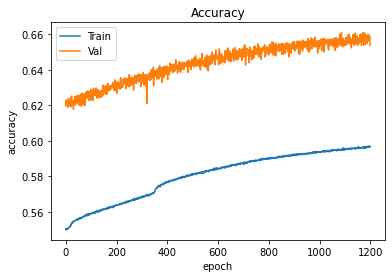

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

In [22]:
model_ckpt2.save("D:/User/Fabio/dl4g-jass-bot/models/cards_trick_model100000_06528")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: D:/User/Fabio/dl4g-jass-bot/models/cards_trick_model100000_06528\assets


In [23]:
model_ckpt3 = create_model()
model_ckpt3.load_weights(checkpoint_path)

In [24]:
loss,acc = model_ckpt3.evaluate(X_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

21250/21250 [==============================] - 23s 1ms/step - loss: 0.8637 - accuracy: 0.6528
Restored model, accuracy: 65.28%


In [25]:
history = model_ckpt3.fit(X_train, y_train, validation_split=0.25, epochs=3000, batch_size=1000, callbacks=[cp_callback])

Epoch 1/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1083 - accuracy: 0.5967 - val_loss: 0.8567 - val_accuracy: 0.6588
Epoch 2/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1089 - accuracy: 0.5967 - val_loss: 0.8582 - val_accuracy: 0.6557
Epoch 3/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1092 - accuracy: 0.5967 - val_loss: 0.8572 - val_accuracy: 0.6570
Epoch 4/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1089 - accuracy: 0.5965 - val_loss: 0.8581 - val_accuracy: 0.6589
Epoch 5/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1085 - accuracy: 0.5967 - val_loss: 0.8562 - val_accuracy: 0.6562
Epoch 6/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1086 - accuracy: 0.5968 - val_loss: 0.8576 - val_accuracy: 0.6575
Epoch 7/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1086 - accuracy: 0.5962 - val_loss: 0.8602 -

Epoch 56/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1056 - accuracy: 0.5977 - val_loss: 0.8566 - val_accuracy: 0.6595
Epoch 57/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1061 - accuracy: 0.5974 - val_loss: 0.8575 - val_accuracy: 0.6595
Epoch 58/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1062 - accuracy: 0.5976 - val_loss: 0.8537 - val_accuracy: 0.6568
Epoch 59/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1063 - accuracy: 0.5971 - val_loss: 0.8557 - val_accuracy: 0.6594
Epoch 60/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1056 - accuracy: 0.5975 - val_loss: 0.8556 - val_accuracy: 0.6577
Epoch 61/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1055 - accuracy: 0.5979 - val_loss: 0.8572 - val_accuracy: 0.6590
Epoch 62/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1054 - accuracy: 0.5979 - val_loss: 0

Epoch 111/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1027 - accuracy: 0.5981 - val_loss: 0.8564 - val_accuracy: 0.6579
Epoch 112/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1030 - accuracy: 0.5983 - val_loss: 0.8575 - val_accuracy: 0.6531
Epoch 113/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1034 - accuracy: 0.5984 - val_loss: 0.8575 - val_accuracy: 0.6540
Epoch 114/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1031 - accuracy: 0.5982 - val_loss: 0.8523 - val_accuracy: 0.6577
Epoch 115/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1039 - accuracy: 0.5975 - val_loss: 0.8532 - val_accuracy: 0.6617
Epoch 116/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1035 - accuracy: 0.5978 - val_loss: 0.8553 - val_accuracy: 0.6576
Epoch 117/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1034 - accuracy: 0.5980 - val_

2040/2040 [==============================] - 5s 2ms/step - loss: 1.1011 - accuracy: 0.5986 - val_loss: 0.8503 - val_accuracy: 0.6609
Epoch 166/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1010 - accuracy: 0.5988 - val_loss: 0.8517 - val_accuracy: 0.6593
Epoch 167/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1015 - accuracy: 0.5986 - val_loss: 0.8511 - val_accuracy: 0.6619
Epoch 168/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1014 - accuracy: 0.5987 - val_loss: 0.8558 - val_accuracy: 0.6575
Epoch 169/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1007 - accuracy: 0.5989 - val_loss: 0.8540 - val_accuracy: 0.6598
Epoch 170/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1018 - accuracy: 0.5983 - val_loss: 0.8538 - val_accuracy: 0.6593
Epoch 171/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.1004 - accuracy: 0.5994 - val_loss: 0.8522 - 

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0899 - accuracy: 0.6030 - val_loss: 0.8495 - val_accuracy: 0.6594
Epoch 220/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0909 - accuracy: 0.6027 - val_loss: 0.8492 - val_accuracy: 0.6621
Epoch 221/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0897 - accuracy: 0.6030 - val_loss: 0.8512 - val_accuracy: 0.6614
Epoch 222/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0899 - accuracy: 0.6027 - val_loss: 0.8473 - val_accuracy: 0.6586
Epoch 223/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0891 - accuracy: 0.6030 - val_loss: 0.8493 - val_accuracy: 0.6591
Epoch 224/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0901 - accuracy: 0.6027 - val_loss: 0.8491 - val_accuracy: 0.6625
Epoch 225/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0893 - accuracy: 0.6029 - val_loss: 0.8497 - 

2040/2040 [==============================] - 4s 2ms/step - loss: 1.0856 - accuracy: 0.6035 - val_loss: 0.8492 - val_accuracy: 0.6585
Epoch 274/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0857 - accuracy: 0.6030 - val_loss: 0.8492 - val_accuracy: 0.6572
Epoch 275/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0853 - accuracy: 0.6037 - val_loss: 0.8485 - val_accuracy: 0.6631
Epoch 276/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0860 - accuracy: 0.6031 - val_loss: 0.8475 - val_accuracy: 0.6593
Epoch 277/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0854 - accuracy: 0.6036 - val_loss: 0.8448 - val_accuracy: 0.6622
Epoch 278/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0849 - accuracy: 0.6037 - val_loss: 0.8514 - val_accuracy: 0.6601
Epoch 279/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0863 - accuracy: 0.6031 - val_loss: 0.8482 - 

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0833 - accuracy: 0.6041 - val_loss: 0.8475 - val_accuracy: 0.6601
Epoch 328/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0838 - accuracy: 0.6033 - val_loss: 0.8442 - val_accuracy: 0.6607
Epoch 329/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0834 - accuracy: 0.6037 - val_loss: 0.8450 - val_accuracy: 0.6605
Epoch 330/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0838 - accuracy: 0.6035 - val_loss: 0.8510 - val_accuracy: 0.6578
Epoch 331/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0832 - accuracy: 0.6039 - val_loss: 0.8463 - val_accuracy: 0.6584
Epoch 332/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0836 - accuracy: 0.6033 - val_loss: 0.8497 - val_accuracy: 0.6592
Epoch 333/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0829 - accuracy: 0.6038 - val_loss: 0.8508 - 

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0819 - accuracy: 0.6038 - val_loss: 0.8484 - val_accuracy: 0.6616
Epoch 382/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0818 - accuracy: 0.6041 - val_loss: 0.8452 - val_accuracy: 0.6617
Epoch 383/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0810 - accuracy: 0.6039 - val_loss: 0.8461 - val_accuracy: 0.6585
Epoch 384/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0812 - accuracy: 0.6041 - val_loss: 0.8464 - val_accuracy: 0.6612
Epoch 385/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0820 - accuracy: 0.6039 - val_loss: 0.8490 - val_accuracy: 0.6570
Epoch 386/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0823 - accuracy: 0.6038 - val_loss: 0.8442 - val_accuracy: 0.6611
Epoch 387/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0822 - accuracy: 0.6038 - val_loss: 0.8465 - 

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0800 - accuracy: 0.6042 - val_loss: 0.8444 - val_accuracy: 0.6599
Epoch 436/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0796 - accuracy: 0.6042 - val_loss: 0.8437 - val_accuracy: 0.6617
Epoch 437/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0802 - accuracy: 0.6043 - val_loss: 0.8442 - val_accuracy: 0.6597
Epoch 438/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0790 - accuracy: 0.6043 - val_loss: 0.8473 - val_accuracy: 0.6584
Epoch 439/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0794 - accuracy: 0.6043 - val_loss: 0.8440 - val_accuracy: 0.6624
Epoch 440/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0794 - accuracy: 0.6041 - val_loss: 0.8461 - val_accuracy: 0.6637
Epoch 441/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0796 - accuracy: 0.6044 - val_loss: 0.8448 - 

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0715 - accuracy: 0.6068 - val_loss: 0.8401 - val_accuracy: 0.6634
Epoch 490/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0705 - accuracy: 0.6071 - val_loss: 0.8472 - val_accuracy: 0.6655
Epoch 491/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0711 - accuracy: 0.6073 - val_loss: 0.8408 - val_accuracy: 0.6611
Epoch 492/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0705 - accuracy: 0.6073 - val_loss: 0.8474 - val_accuracy: 0.6575
Epoch 493/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0711 - accuracy: 0.6074 - val_loss: 0.8440 - val_accuracy: 0.6628
Epoch 494/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0703 - accuracy: 0.6075 - val_loss: 0.8397 - val_accuracy: 0.6630
Epoch 495/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0707 - accuracy: 0.6074 - val_loss: 0.8429 - 

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0661 - accuracy: 0.6088 - val_loss: 0.8433 - val_accuracy: 0.6610
Epoch 544/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0665 - accuracy: 0.6084 - val_loss: 0.8429 - val_accuracy: 0.6599
Epoch 545/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0667 - accuracy: 0.6087 - val_loss: 0.8404 - val_accuracy: 0.6616
Epoch 546/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0662 - accuracy: 0.6085 - val_loss: 0.8443 - val_accuracy: 0.6608
Epoch 547/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0661 - accuracy: 0.6091 - val_loss: 0.8449 - val_accuracy: 0.6606
Epoch 548/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0665 - accuracy: 0.6086 - val_loss: 0.8454 - val_accuracy: 0.6629
Epoch 549/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0663 - accuracy: 0.6086 - val_loss: 0.8377 - 

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0646 - accuracy: 0.6088 - val_loss: 0.8433 - val_accuracy: 0.6621
Epoch 598/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0648 - accuracy: 0.6085 - val_loss: 0.8419 - val_accuracy: 0.6648
Epoch 599/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0636 - accuracy: 0.6092 - val_loss: 0.8371 - val_accuracy: 0.6629
Epoch 600/3000
2024/2040 [============================>.] - ETA: 0s - loss: 1.0637 - accuracy: 0.6087
Epoch 00600: saving model to train_ckpt\cp.ckpt
2040/2040 [==============================] - 5s 3ms/step - loss: 1.0638 - accuracy: 0.6087 - val_loss: 0.8421 - val_accuracy: 0.6608
Epoch 601/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0633 - accuracy: 0.6095 - val_loss: 0.8395 - val_accuracy: 0.6626
Epoch 602/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0635 - accuracy: 0.6091 - val_loss: 0.8424 - val_accuracy:

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0621 - accuracy: 0.6091 - val_loss: 0.8370 - val_accuracy: 0.6615
Epoch 651/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0624 - accuracy: 0.6088 - val_loss: 0.8376 - val_accuracy: 0.6636
Epoch 652/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0624 - accuracy: 0.6092 - val_loss: 0.8407 - val_accuracy: 0.6607
Epoch 653/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0621 - accuracy: 0.6090 - val_loss: 0.8392 - val_accuracy: 0.6649
Epoch 654/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0618 - accuracy: 0.6089 - val_loss: 0.8408 - val_accuracy: 0.6628
Epoch 655/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0615 - accuracy: 0.6092 - val_loss: 0.8437 - val_accuracy: 0.6662
Epoch 656/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0622 - accuracy: 0.6090 - val_loss: 0.8397 - 

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0605 - accuracy: 0.6094 - val_loss: 0.8363 - val_accuracy: 0.6640
Epoch 705/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0599 - accuracy: 0.6096 - val_loss: 0.8355 - val_accuracy: 0.6634
Epoch 706/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0603 - accuracy: 0.6091 - val_loss: 0.8358 - val_accuracy: 0.6654
Epoch 707/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0603 - accuracy: 0.6097 - val_loss: 0.8390 - val_accuracy: 0.6641
Epoch 708/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0611 - accuracy: 0.6090 - val_loss: 0.8377 - val_accuracy: 0.6627
Epoch 709/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0598 - accuracy: 0.6097 - val_loss: 0.8379 - val_accuracy: 0.6607
Epoch 710/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0603 - accuracy: 0.6095 - val_loss: 0.8365 - 

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0591 - accuracy: 0.6093 - val_loss: 0.8388 - val_accuracy: 0.6639
Epoch 759/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0594 - accuracy: 0.6096 - val_loss: 0.8378 - val_accuracy: 0.6611
Epoch 760/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0597 - accuracy: 0.6097 - val_loss: 0.8376 - val_accuracy: 0.6635
Epoch 761/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0587 - accuracy: 0.6097 - val_loss: 0.8389 - val_accuracy: 0.6657
Epoch 762/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0596 - accuracy: 0.6095 - val_loss: 0.8398 - val_accuracy: 0.6621
Epoch 763/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0593 - accuracy: 0.6091 - val_loss: 0.8384 - val_accuracy: 0.6629
Epoch 764/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0587 - accuracy: 0.6091 - val_loss: 0.8399 - 

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0579 - accuracy: 0.6098 - val_loss: 0.8393 - val_accuracy: 0.6620
Epoch 813/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0579 - accuracy: 0.6097 - val_loss: 0.8378 - val_accuracy: 0.6655
Epoch 814/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0573 - accuracy: 0.6101 - val_loss: 0.8414 - val_accuracy: 0.6621
Epoch 815/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0582 - accuracy: 0.6098 - val_loss: 0.8423 - val_accuracy: 0.6640
Epoch 816/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0576 - accuracy: 0.6098 - val_loss: 0.8383 - val_accuracy: 0.6645
Epoch 817/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0572 - accuracy: 0.6100 - val_loss: 0.8400 - val_accuracy: 0.6670
Epoch 818/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0572 - accuracy: 0.6103 - val_loss: 0.8343 - 

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0554 - accuracy: 0.6107 - val_loss: 0.8386 - val_accuracy: 0.6637
Epoch 867/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0558 - accuracy: 0.6101 - val_loss: 0.8339 - val_accuracy: 0.6656
Epoch 868/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0569 - accuracy: 0.6099 - val_loss: 0.8365 - val_accuracy: 0.6620
Epoch 869/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0561 - accuracy: 0.6104 - val_loss: 0.8373 - val_accuracy: 0.6625
Epoch 870/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0563 - accuracy: 0.6099 - val_loss: 0.8410 - val_accuracy: 0.6653
Epoch 871/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0558 - accuracy: 0.6101 - val_loss: 0.8356 - val_accuracy: 0.6636
Epoch 872/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0561 - accuracy: 0.6101 - val_loss: 0.8355 - 

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0548 - accuracy: 0.6103 - val_loss: 0.8352 - val_accuracy: 0.6635
Epoch 921/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0551 - accuracy: 0.6100 - val_loss: 0.8379 - val_accuracy: 0.6582
Epoch 922/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0546 - accuracy: 0.6104 - val_loss: 0.8388 - val_accuracy: 0.6657
Epoch 923/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0549 - accuracy: 0.6102 - val_loss: 0.8339 - val_accuracy: 0.6660
Epoch 924/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0541 - accuracy: 0.6105 - val_loss: 0.8350 - val_accuracy: 0.6652
Epoch 925/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0546 - accuracy: 0.6102 - val_loss: 0.8351 - val_accuracy: 0.6638
Epoch 926/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0549 - accuracy: 0.6105 - val_loss: 0.8358 - 

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0531 - accuracy: 0.6104 - val_loss: 0.8367 - val_accuracy: 0.6644
Epoch 975/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0532 - accuracy: 0.6107 - val_loss: 0.8333 - val_accuracy: 0.6641
Epoch 976/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0528 - accuracy: 0.6108 - val_loss: 0.8385 - val_accuracy: 0.6618
Epoch 977/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0533 - accuracy: 0.6105 - val_loss: 0.8396 - val_accuracy: 0.6605
Epoch 978/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0537 - accuracy: 0.6101 - val_loss: 0.8348 - val_accuracy: 0.6627
Epoch 979/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0536 - accuracy: 0.6103 - val_loss: 0.8347 - val_accuracy: 0.6629
Epoch 980/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0533 - accuracy: 0.6102 - val_loss: 0.8348 - 

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0520 - accuracy: 0.6108 - val_loss: 0.8386 - val_accuracy: 0.6601
Epoch 1029/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0521 - accuracy: 0.6109 - val_loss: 0.8401 - val_accuracy: 0.6645
Epoch 1030/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0532 - accuracy: 0.6103 - val_loss: 0.8353 - val_accuracy: 0.6663
Epoch 1031/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0519 - accuracy: 0.6109 - val_loss: 0.8352 - val_accuracy: 0.6653
Epoch 1032/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0526 - accuracy: 0.6105 - val_loss: 0.8343 - val_accuracy: 0.6653
Epoch 1033/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0517 - accuracy: 0.6107 - val_loss: 0.8339 - val_accuracy: 0.6655
Epoch 1034/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0522 - accuracy: 0.6111 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0514 - accuracy: 0.6105 - val_loss: 0.8357 - val_accuracy: 0.6634
Epoch 1083/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0515 - accuracy: 0.6107 - val_loss: 0.8353 - val_accuracy: 0.6653
Epoch 1084/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0516 - accuracy: 0.6111 - val_loss: 0.8327 - val_accuracy: 0.6645
Epoch 1085/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0518 - accuracy: 0.6105 - val_loss: 0.8327 - val_accuracy: 0.6651
Epoch 1086/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0506 - accuracy: 0.6108 - val_loss: 0.8342 - val_accuracy: 0.6623
Epoch 1087/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0517 - accuracy: 0.6102 - val_loss: 0.8341 - val_accuracy: 0.6666
Epoch 1088/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0515 - accuracy: 0.6113 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0510 - accuracy: 0.6107 - val_loss: 0.8318 - val_accuracy: 0.6634
Epoch 1137/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0507 - accuracy: 0.6108 - val_loss: 0.8321 - val_accuracy: 0.6617
Epoch 1138/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0502 - accuracy: 0.6108 - val_loss: 0.8328 - val_accuracy: 0.6668
Epoch 1139/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0498 - accuracy: 0.6115 - val_loss: 0.8346 - val_accuracy: 0.6682
Epoch 1140/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0502 - accuracy: 0.6109 - val_loss: 0.8388 - val_accuracy: 0.6644
Epoch 1141/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0504 - accuracy: 0.6108 - val_loss: 0.8362 - val_accuracy: 0.6637
Epoch 1142/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0501 - accuracy: 0.6108 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0490 - accuracy: 0.6109 - val_loss: 0.8319 - val_accuracy: 0.6635
Epoch 1191/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0489 - accuracy: 0.6111 - val_loss: 0.8338 - val_accuracy: 0.6658
Epoch 1192/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0491 - accuracy: 0.6113 - val_loss: 0.8320 - val_accuracy: 0.6632
Epoch 1193/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0486 - accuracy: 0.6112 - val_loss: 0.8375 - val_accuracy: 0.6609
Epoch 1194/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0484 - accuracy: 0.6115 - val_loss: 0.8355 - val_accuracy: 0.6650
Epoch 1195/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0490 - accuracy: 0.6113 - val_loss: 0.8327 - val_accuracy: 0.6668
Epoch 1196/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0483 - accuracy: 0.6112 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0478 - accuracy: 0.6110 - val_loss: 0.8328 - val_accuracy: 0.6672
Epoch 1245/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0482 - accuracy: 0.6115 - val_loss: 0.8427 - val_accuracy: 0.6613
Epoch 1246/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0483 - accuracy: 0.6112 - val_loss: 0.8329 - val_accuracy: 0.6610
Epoch 1247/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0477 - accuracy: 0.6112 - val_loss: 0.8340 - val_accuracy: 0.6655
Epoch 1248/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0484 - accuracy: 0.6113 - val_loss: 0.8318 - val_accuracy: 0.6653
Epoch 1249/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0481 - accuracy: 0.6115 - val_loss: 0.8345 - val_accuracy: 0.6655
Epoch 1250/3000
2014/2040 [============================>.] - ETA: 0s - loss: 1.0480 - accuracy: 0.6117
Epoch 01250: saving

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0467 - accuracy: 0.6119 - val_loss: 0.8350 - val_accuracy: 0.6644
Epoch 1299/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0474 - accuracy: 0.6115 - val_loss: 0.8347 - val_accuracy: 0.6654
Epoch 1300/3000
2039/2040 [============================>.] - ETA: 0s - loss: 1.0476 - accuracy: 0.6113
Epoch 01300: saving model to train_ckpt\cp.ckpt
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0476 - accuracy: 0.6113 - val_loss: 0.8348 - val_accuracy: 0.6650
Epoch 1301/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0476 - accuracy: 0.6114 - val_loss: 0.8337 - val_accuracy: 0.6636
Epoch 1302/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0469 - accuracy: 0.6117 - val_loss: 0.8313 - val_accuracy: 0.6650
Epoch 1303/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0464 - accuracy: 0.6121 - val_loss: 0.8351 - val_accu

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0461 - accuracy: 0.6115 - val_loss: 0.8328 - val_accuracy: 0.6636
Epoch 1352/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0462 - accuracy: 0.6119 - val_loss: 0.8332 - val_accuracy: 0.6636
Epoch 1353/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0459 - accuracy: 0.6117 - val_loss: 0.8326 - val_accuracy: 0.6615
Epoch 1354/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0462 - accuracy: 0.6118 - val_loss: 0.8368 - val_accuracy: 0.6626
Epoch 1355/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0459 - accuracy: 0.6116 - val_loss: 0.8370 - val_accuracy: 0.6657
Epoch 1356/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0465 - accuracy: 0.6114 - val_loss: 0.8383 - val_accuracy: 0.6612
Epoch 1357/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0461 - accuracy: 0.6113 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0454 - accuracy: 0.6115 - val_loss: 0.8368 - val_accuracy: 0.6605
Epoch 1406/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0450 - accuracy: 0.6115 - val_loss: 0.8358 - val_accuracy: 0.6640
Epoch 1407/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0445 - accuracy: 0.6122 - val_loss: 0.8296 - val_accuracy: 0.6652
Epoch 1408/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0451 - accuracy: 0.6118 - val_loss: 0.8357 - val_accuracy: 0.6623
Epoch 1409/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0443 - accuracy: 0.6120 - val_loss: 0.8332 - val_accuracy: 0.6643
Epoch 1410/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0449 - accuracy: 0.6115 - val_loss: 0.8387 - val_accuracy: 0.6669
Epoch 1411/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0450 - accuracy: 0.6115 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0443 - accuracy: 0.6117 - val_loss: 0.8366 - val_accuracy: 0.6662
Epoch 1460/3000
2040/2040 [==============================] - 6s 3ms/step - loss: 1.0440 - accuracy: 0.6118 - val_loss: 0.8324 - val_accuracy: 0.6666
Epoch 1461/3000
2040/2040 [==============================] - 5s 3ms/step - loss: 1.0445 - accuracy: 0.6116 - val_loss: 0.8320 - val_accuracy: 0.6666
Epoch 1462/3000
2040/2040 [==============================] - 5s 3ms/step - loss: 1.0434 - accuracy: 0.6125 - val_loss: 0.8356 - val_accuracy: 0.6663
Epoch 1463/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0444 - accuracy: 0.6117 - val_loss: 0.8326 - val_accuracy: 0.6648
Epoch 1464/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0436 - accuracy: 0.6118 - val_loss: 0.8346 - val_accuracy: 0.6600
Epoch 1465/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0444 - accuracy: 0.6119 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0429 - accuracy: 0.6120 - val_loss: 0.8401 - val_accuracy: 0.6639
Epoch 1514/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0431 - accuracy: 0.6123 - val_loss: 0.8339 - val_accuracy: 0.6649
Epoch 1515/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0436 - accuracy: 0.6120 - val_loss: 0.8301 - val_accuracy: 0.6672
Epoch 1516/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0437 - accuracy: 0.6116 - val_loss: 0.8322 - val_accuracy: 0.6656
Epoch 1517/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0436 - accuracy: 0.6124 - val_loss: 0.8350 - val_accuracy: 0.6651
Epoch 1518/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0436 - accuracy: 0.6122 - val_loss: 0.8335 - val_accuracy: 0.6672
Epoch 1519/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0430 - accuracy: 0.6122 - val_loss: 0.8

2040/2040 [==============================] - 4s 2ms/step - loss: 1.0426 - accuracy: 0.6118 - val_loss: 0.8299 - val_accuracy: 0.6649
Epoch 1568/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0430 - accuracy: 0.6121 - val_loss: 0.8311 - val_accuracy: 0.6672
Epoch 1569/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0429 - accuracy: 0.6122 - val_loss: 0.8375 - val_accuracy: 0.6654
Epoch 1570/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0426 - accuracy: 0.6120 - val_loss: 0.8320 - val_accuracy: 0.6647
Epoch 1571/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0421 - accuracy: 0.6124 - val_loss: 0.8357 - val_accuracy: 0.6651
Epoch 1572/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0428 - accuracy: 0.6126 - val_loss: 0.8338 - val_accuracy: 0.6655
Epoch 1573/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0430 - accuracy: 0.6125 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0417 - accuracy: 0.6120 - val_loss: 0.8308 - val_accuracy: 0.6658
Epoch 1622/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0418 - accuracy: 0.6122 - val_loss: 0.8314 - val_accuracy: 0.6671
Epoch 1623/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0410 - accuracy: 0.6126 - val_loss: 0.8314 - val_accuracy: 0.6632
Epoch 1624/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0424 - accuracy: 0.6118 - val_loss: 0.8318 - val_accuracy: 0.6649
Epoch 1625/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0413 - accuracy: 0.6127 - val_loss: 0.8316 - val_accuracy: 0.6647
Epoch 1626/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0423 - accuracy: 0.6118 - val_loss: 0.8328 - val_accuracy: 0.6668
Epoch 1627/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0410 - accuracy: 0.6123 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0416 - accuracy: 0.6125 - val_loss: 0.8298 - val_accuracy: 0.6638
Epoch 1676/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0416 - accuracy: 0.6125 - val_loss: 0.8332 - val_accuracy: 0.6648
Epoch 1677/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0420 - accuracy: 0.6119 - val_loss: 0.8308 - val_accuracy: 0.6672
Epoch 1678/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0410 - accuracy: 0.6125 - val_loss: 0.8349 - val_accuracy: 0.6631
Epoch 1679/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0411 - accuracy: 0.6125 - val_loss: 0.8317 - val_accuracy: 0.6670
Epoch 1680/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0413 - accuracy: 0.6125 - val_loss: 0.8314 - val_accuracy: 0.6617
Epoch 1681/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0404 - accuracy: 0.6128 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0405 - accuracy: 0.6126 - val_loss: 0.8337 - val_accuracy: 0.6634
Epoch 1730/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0408 - accuracy: 0.6127 - val_loss: 0.8290 - val_accuracy: 0.6666
Epoch 1731/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0400 - accuracy: 0.6128 - val_loss: 0.8333 - val_accuracy: 0.6646
Epoch 1732/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0403 - accuracy: 0.6126 - val_loss: 0.8326 - val_accuracy: 0.6664
Epoch 1733/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0403 - accuracy: 0.6130 - val_loss: 0.8299 - val_accuracy: 0.6632
Epoch 1734/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0403 - accuracy: 0.6126 - val_loss: 0.8320 - val_accuracy: 0.6671
Epoch 1735/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0410 - accuracy: 0.6123 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0401 - accuracy: 0.6128 - val_loss: 0.8338 - val_accuracy: 0.6670
Epoch 1784/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0394 - accuracy: 0.6128 - val_loss: 0.8270 - val_accuracy: 0.6664
Epoch 1785/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0399 - accuracy: 0.6126 - val_loss: 0.8382 - val_accuracy: 0.6686
Epoch 1786/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0401 - accuracy: 0.6128 - val_loss: 0.8325 - val_accuracy: 0.6639
Epoch 1787/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0398 - accuracy: 0.6128 - val_loss: 0.8305 - val_accuracy: 0.6667
Epoch 1788/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0398 - accuracy: 0.6130 - val_loss: 0.8305 - val_accuracy: 0.6663
Epoch 1789/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0393 - accuracy: 0.6131 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0382 - accuracy: 0.6135 - val_loss: 0.8374 - val_accuracy: 0.6663
Epoch 1838/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0388 - accuracy: 0.6132 - val_loss: 0.8321 - val_accuracy: 0.6655
Epoch 1839/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0391 - accuracy: 0.6127 - val_loss: 0.8310 - val_accuracy: 0.6652
Epoch 1840/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0389 - accuracy: 0.6129 - val_loss: 0.8278 - val_accuracy: 0.6660
Epoch 1841/3000
2040/2040 [==============================] - 5s 3ms/step - loss: 1.0387 - accuracy: 0.6129 - val_loss: 0.8328 - val_accuracy: 0.6659
Epoch 1842/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0388 - accuracy: 0.6132 - val_loss: 0.8298 - val_accuracy: 0.6636
Epoch 1843/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0394 - accuracy: 0.6128 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0382 - accuracy: 0.6135 - val_loss: 0.8448 - val_accuracy: 0.6588
Epoch 1892/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0387 - accuracy: 0.6128 - val_loss: 0.8253 - val_accuracy: 0.6665
Epoch 1893/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0389 - accuracy: 0.6129 - val_loss: 0.8389 - val_accuracy: 0.6622
Epoch 1894/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0375 - accuracy: 0.6133 - val_loss: 0.8322 - val_accuracy: 0.6663
Epoch 1895/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0380 - accuracy: 0.6135 - val_loss: 0.8312 - val_accuracy: 0.6638
Epoch 1896/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0392 - accuracy: 0.6128 - val_loss: 0.8311 - val_accuracy: 0.6643
Epoch 1897/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0384 - accuracy: 0.6129 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0383 - accuracy: 0.6127 - val_loss: 0.8300 - val_accuracy: 0.6672
Epoch 1946/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0384 - accuracy: 0.6130 - val_loss: 0.8328 - val_accuracy: 0.6684
Epoch 1947/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0382 - accuracy: 0.6129 - val_loss: 0.8328 - val_accuracy: 0.6649
Epoch 1948/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0380 - accuracy: 0.6127 - val_loss: 0.8313 - val_accuracy: 0.6672
Epoch 1949/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0382 - accuracy: 0.6129 - val_loss: 0.8269 - val_accuracy: 0.6682
Epoch 1950/3000
2035/2040 [============================>.] - ETA: 0s - loss: 1.0381 - accuracy: 0.6130
Epoch 01950: saving model to train_ckpt\cp.ckpt
2040/2040 [==============================] - 5s 3ms/step - loss: 1.0381 - accuracy: 0.6130 - val_loss: 0.8310 - val_accu

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0368 - accuracy: 0.6129 - val_loss: 0.8320 - val_accuracy: 0.6680
Epoch 2000/3000
2019/2040 [============================>.] - ETA: 0s - loss: 1.0373 - accuracy: 0.6135
Epoch 02000: saving model to train_ckpt\cp.ckpt
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0373 - accuracy: 0.6135 - val_loss: 0.8308 - val_accuracy: 0.6676
Epoch 2001/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0371 - accuracy: 0.6133 - val_loss: 0.8322 - val_accuracy: 0.6658
Epoch 2002/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0369 - accuracy: 0.6136 - val_loss: 0.8281 - val_accuracy: 0.6656
Epoch 2003/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0372 - accuracy: 0.6133 - val_loss: 0.8378 - val_accuracy: 0.6641
Epoch 2004/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0375 - accuracy: 0.6136 - val_loss: 0.8301 - val_accu

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0365 - accuracy: 0.6134 - val_loss: 0.8307 - val_accuracy: 0.6655
Epoch 2053/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0366 - accuracy: 0.6134 - val_loss: 0.8321 - val_accuracy: 0.6632
Epoch 2054/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0368 - accuracy: 0.6137 - val_loss: 0.8329 - val_accuracy: 0.6697
Epoch 2055/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0358 - accuracy: 0.6134 - val_loss: 0.8279 - val_accuracy: 0.6643
Epoch 2056/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0364 - accuracy: 0.6137 - val_loss: 0.8313 - val_accuracy: 0.6670
Epoch 2057/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0363 - accuracy: 0.6132 - val_loss: 0.8302 - val_accuracy: 0.6681
Epoch 2058/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0360 - accuracy: 0.6132 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0360 - accuracy: 0.6137 - val_loss: 0.8318 - val_accuracy: 0.6668
Epoch 2107/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0357 - accuracy: 0.6137 - val_loss: 0.8311 - val_accuracy: 0.6631
Epoch 2108/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0362 - accuracy: 0.6132 - val_loss: 0.8305 - val_accuracy: 0.6683
Epoch 2109/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0361 - accuracy: 0.6139 - val_loss: 0.8304 - val_accuracy: 0.6658
Epoch 2110/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0361 - accuracy: 0.6135 - val_loss: 0.8294 - val_accuracy: 0.6673
Epoch 2111/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0354 - accuracy: 0.6141 - val_loss: 0.8311 - val_accuracy: 0.6662
Epoch 2112/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0360 - accuracy: 0.6135 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0352 - accuracy: 0.6133 - val_loss: 0.8362 - val_accuracy: 0.6644
Epoch 2161/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0352 - accuracy: 0.6138 - val_loss: 0.8299 - val_accuracy: 0.6685
Epoch 2162/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0354 - accuracy: 0.6136 - val_loss: 0.8334 - val_accuracy: 0.6682
Epoch 2163/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0357 - accuracy: 0.6140 - val_loss: 0.8294 - val_accuracy: 0.6671
Epoch 2164/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0359 - accuracy: 0.6133 - val_loss: 0.8294 - val_accuracy: 0.6669
Epoch 2165/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0351 - accuracy: 0.6138 - val_loss: 0.8391 - val_accuracy: 0.6640
Epoch 2166/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0353 - accuracy: 0.6138 - val_loss: 0.8

2040/2040 [==============================] - 4s 2ms/step - loss: 1.0349 - accuracy: 0.6136 - val_loss: 0.8334 - val_accuracy: 0.6652
Epoch 2215/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0349 - accuracy: 0.6137 - val_loss: 0.8302 - val_accuracy: 0.6668
Epoch 2216/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0345 - accuracy: 0.6138 - val_loss: 0.8305 - val_accuracy: 0.6675
Epoch 2217/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0351 - accuracy: 0.6138 - val_loss: 0.8273 - val_accuracy: 0.6684
Epoch 2218/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0349 - accuracy: 0.6138 - val_loss: 0.8309 - val_accuracy: 0.6656
Epoch 2219/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0352 - accuracy: 0.6134 - val_loss: 0.8296 - val_accuracy: 0.6652
Epoch 2220/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0341 - accuracy: 0.6142 - val_loss: 0.8

2040/2040 [==============================] - 4s 2ms/step - loss: 1.0350 - accuracy: 0.6131 - val_loss: 0.8363 - val_accuracy: 0.6681
Epoch 2269/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0340 - accuracy: 0.6142 - val_loss: 0.8376 - val_accuracy: 0.6690
Epoch 2270/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0344 - accuracy: 0.6135 - val_loss: 0.8318 - val_accuracy: 0.6668
Epoch 2271/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0343 - accuracy: 0.6135 - val_loss: 0.8300 - val_accuracy: 0.6652
Epoch 2272/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0342 - accuracy: 0.6136 - val_loss: 0.8331 - val_accuracy: 0.6670
Epoch 2273/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0341 - accuracy: 0.6134 - val_loss: 0.8316 - val_accuracy: 0.6666
Epoch 2274/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0338 - accuracy: 0.6138 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0338 - accuracy: 0.6138 - val_loss: 0.8350 - val_accuracy: 0.6653
Epoch 2323/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0336 - accuracy: 0.6141 - val_loss: 0.8313 - val_accuracy: 0.6691
Epoch 2324/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0340 - accuracy: 0.6138 - val_loss: 0.8365 - val_accuracy: 0.6605
Epoch 2325/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0340 - accuracy: 0.6138 - val_loss: 0.8305 - val_accuracy: 0.6683
Epoch 2326/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0347 - accuracy: 0.6136 - val_loss: 0.8285 - val_accuracy: 0.6654
Epoch 2327/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0338 - accuracy: 0.6137 - val_loss: 0.8299 - val_accuracy: 0.6662
Epoch 2328/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0336 - accuracy: 0.6139 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0332 - accuracy: 0.6140 - val_loss: 0.8296 - val_accuracy: 0.6661
Epoch 2377/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0334 - accuracy: 0.6139 - val_loss: 0.8315 - val_accuracy: 0.6663
Epoch 2378/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0332 - accuracy: 0.6137 - val_loss: 0.8359 - val_accuracy: 0.6620
Epoch 2379/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0331 - accuracy: 0.6139 - val_loss: 0.8308 - val_accuracy: 0.6661
Epoch 2380/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0336 - accuracy: 0.6134 - val_loss: 0.8323 - val_accuracy: 0.6652
Epoch 2381/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0330 - accuracy: 0.6141 - val_loss: 0.8296 - val_accuracy: 0.6655
Epoch 2382/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0339 - accuracy: 0.6135 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0329 - accuracy: 0.6140 - val_loss: 0.8288 - val_accuracy: 0.6663
Epoch 2431/3000
2040/2040 [==============================] - 5s 3ms/step - loss: 1.0329 - accuracy: 0.6133 - val_loss: 0.8297 - val_accuracy: 0.6671
Epoch 2432/3000
2040/2040 [==============================] - 5s 3ms/step - loss: 1.0327 - accuracy: 0.6143 - val_loss: 0.8377 - val_accuracy: 0.6678
Epoch 2433/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0334 - accuracy: 0.6138 - val_loss: 0.8320 - val_accuracy: 0.6642
Epoch 2434/3000
2040/2040 [==============================] - 5s 3ms/step - loss: 1.0327 - accuracy: 0.6138 - val_loss: 0.8324 - val_accuracy: 0.6661
Epoch 2435/3000
2040/2040 [==============================] - 5s 3ms/step - loss: 1.0331 - accuracy: 0.6139 - val_loss: 0.8290 - val_accuracy: 0.6648
Epoch 2436/3000
2040/2040 [==============================] - 5s 3ms/step - loss: 1.0326 - accuracy: 0.6139 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0323 - accuracy: 0.6139 - val_loss: 0.8301 - val_accuracy: 0.6667
Epoch 2485/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0324 - accuracy: 0.6143 - val_loss: 0.8353 - val_accuracy: 0.6676
Epoch 2486/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0321 - accuracy: 0.6142 - val_loss: 0.8308 - val_accuracy: 0.6622
Epoch 2487/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0324 - accuracy: 0.6142 - val_loss: 0.8316 - val_accuracy: 0.6675
Epoch 2488/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0325 - accuracy: 0.6141 - val_loss: 0.8332 - val_accuracy: 0.6667
Epoch 2489/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0314 - accuracy: 0.6138 - val_loss: 0.8272 - val_accuracy: 0.6653
Epoch 2490/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0324 - accuracy: 0.6141 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0313 - accuracy: 0.6140 - val_loss: 0.8343 - val_accuracy: 0.6641
Epoch 2539/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0321 - accuracy: 0.6143 - val_loss: 0.8263 - val_accuracy: 0.6680
Epoch 2540/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0320 - accuracy: 0.6138 - val_loss: 0.8322 - val_accuracy: 0.6636
Epoch 2541/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0302 - accuracy: 0.6144 - val_loss: 0.8335 - val_accuracy: 0.6670
Epoch 2542/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0305 - accuracy: 0.6146 - val_loss: 0.8321 - val_accuracy: 0.6626
Epoch 2543/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0311 - accuracy: 0.6143 - val_loss: 0.8344 - val_accuracy: 0.6616
Epoch 2544/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0312 - accuracy: 0.6145 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0228 - accuracy: 0.6174 - val_loss: 0.8280 - val_accuracy: 0.6658
Epoch 2593/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0227 - accuracy: 0.6171 - val_loss: 0.8286 - val_accuracy: 0.6664
Epoch 2594/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0231 - accuracy: 0.6173 - val_loss: 0.8304 - val_accuracy: 0.6655
Epoch 2595/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0226 - accuracy: 0.6168 - val_loss: 0.8284 - val_accuracy: 0.6673
Epoch 2596/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0220 - accuracy: 0.6178 - val_loss: 0.8282 - val_accuracy: 0.6666
Epoch 2597/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0229 - accuracy: 0.6173 - val_loss: 0.8265 - val_accuracy: 0.6673
Epoch 2598/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0222 - accuracy: 0.6172 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0214 - accuracy: 0.6175 - val_loss: 0.8248 - val_accuracy: 0.6648
Epoch 2647/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0208 - accuracy: 0.6176 - val_loss: 0.8315 - val_accuracy: 0.6656
Epoch 2648/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0212 - accuracy: 0.6175 - val_loss: 0.8238 - val_accuracy: 0.6671
Epoch 2649/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0212 - accuracy: 0.6173 - val_loss: 0.8290 - val_accuracy: 0.6647
Epoch 2650/3000
2016/2040 [============================>.] - ETA: 0s - loss: 1.0210 - accuracy: 0.6172
Epoch 02650: saving model to train_ckpt\cp.ckpt
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0211 - accuracy: 0.6171 - val_loss: 0.8287 - val_accuracy: 0.6656
Epoch 2651/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0207 - accuracy: 0.6176 - val_loss: 0.8314 - val_accu

2023/2040 [============================>.] - ETA: 0s - loss: 1.0206 - accuracy: 0.6177
Epoch 02700: saving model to train_ckpt\cp.ckpt
2040/2040 [==============================] - 5s 3ms/step - loss: 1.0205 - accuracy: 0.6177 - val_loss: 0.8293 - val_accuracy: 0.6672
Epoch 2701/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0206 - accuracy: 0.6177 - val_loss: 0.8295 - val_accuracy: 0.6687
Epoch 2702/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0212 - accuracy: 0.6176 - val_loss: 0.8289 - val_accuracy: 0.6669
Epoch 2703/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0206 - accuracy: 0.6174 - val_loss: 0.8274 - val_accuracy: 0.6703
Epoch 2704/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0206 - accuracy: 0.6174 - val_loss: 0.8282 - val_accuracy: 0.6678
Epoch 2705/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0203 - accuracy: 0.6178 - val_loss: 0.8278 - val_accu

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0211 - accuracy: 0.6174 - val_loss: 0.8314 - val_accuracy: 0.6670
Epoch 2754/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0199 - accuracy: 0.6178 - val_loss: 0.8306 - val_accuracy: 0.6685
Epoch 2755/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0202 - accuracy: 0.6173 - val_loss: 0.8253 - val_accuracy: 0.6656
Epoch 2756/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0202 - accuracy: 0.6175 - val_loss: 0.8279 - val_accuracy: 0.6691
Epoch 2757/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0193 - accuracy: 0.6180 - val_loss: 0.8306 - val_accuracy: 0.6644
Epoch 2758/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0202 - accuracy: 0.6181 - val_loss: 0.8237 - val_accuracy: 0.6660
Epoch 2759/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0199 - accuracy: 0.6177 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0201 - accuracy: 0.6180 - val_loss: 0.8299 - val_accuracy: 0.6684
Epoch 2808/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0186 - accuracy: 0.6176 - val_loss: 0.8279 - val_accuracy: 0.6656
Epoch 2809/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0198 - accuracy: 0.6172 - val_loss: 0.8253 - val_accuracy: 0.6636
Epoch 2810/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0199 - accuracy: 0.6176 - val_loss: 0.8272 - val_accuracy: 0.6624
Epoch 2811/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0194 - accuracy: 0.6172 - val_loss: 0.8264 - val_accuracy: 0.6644
Epoch 2812/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0192 - accuracy: 0.6174 - val_loss: 0.8241 - val_accuracy: 0.6660
Epoch 2813/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0195 - accuracy: 0.6177 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0187 - accuracy: 0.6179 - val_loss: 0.8276 - val_accuracy: 0.6660
Epoch 2862/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0190 - accuracy: 0.6176 - val_loss: 0.8226 - val_accuracy: 0.6660
Epoch 2863/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0197 - accuracy: 0.6174 - val_loss: 0.8285 - val_accuracy: 0.6686
Epoch 2864/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0196 - accuracy: 0.6175 - val_loss: 0.8234 - val_accuracy: 0.6658
Epoch 2865/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0188 - accuracy: 0.6176 - val_loss: 0.8264 - val_accuracy: 0.6685
Epoch 2866/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0189 - accuracy: 0.6179 - val_loss: 0.8270 - val_accuracy: 0.6652
Epoch 2867/3000
2040/2040 [==============================] - 4s 2ms/step - loss: 1.0195 - accuracy: 0.6177 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0182 - accuracy: 0.6176 - val_loss: 0.8309 - val_accuracy: 0.6636
Epoch 2916/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0175 - accuracy: 0.6179 - val_loss: 0.8257 - val_accuracy: 0.6686
Epoch 2917/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0181 - accuracy: 0.6176 - val_loss: 0.8259 - val_accuracy: 0.6678
Epoch 2918/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0190 - accuracy: 0.6179 - val_loss: 0.8235 - val_accuracy: 0.6661
Epoch 2919/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0182 - accuracy: 0.6176 - val_loss: 0.8286 - val_accuracy: 0.6679
Epoch 2920/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0181 - accuracy: 0.6183 - val_loss: 0.8333 - val_accuracy: 0.6631
Epoch 2921/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0187 - accuracy: 0.6175 - val_loss: 0.8

2040/2040 [==============================] - 5s 2ms/step - loss: 1.0180 - accuracy: 0.6178 - val_loss: 0.8246 - val_accuracy: 0.6672
Epoch 2970/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0184 - accuracy: 0.6179 - val_loss: 0.8255 - val_accuracy: 0.6657
Epoch 2971/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0186 - accuracy: 0.6174 - val_loss: 0.8253 - val_accuracy: 0.6688
Epoch 2972/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0175 - accuracy: 0.6174 - val_loss: 0.8251 - val_accuracy: 0.6673
Epoch 2973/3000
2040/2040 [==============================] - 5s 3ms/step - loss: 1.0180 - accuracy: 0.6179 - val_loss: 0.8290 - val_accuracy: 0.6664
Epoch 2974/3000
2040/2040 [==============================] - 5s 3ms/step - loss: 1.0187 - accuracy: 0.6172 - val_loss: 0.8255 - val_accuracy: 0.6659
Epoch 2975/3000
2040/2040 [==============================] - 5s 2ms/step - loss: 1.0174 - accuracy: 0.6180 - val_loss: 0.8

In [26]:
model_ckpt3.evaluate(X_test, y_test)

21250/21250 [==============================] - 24s 1ms/step - loss: 0.8386 - accuracy: 0.6610


[0.8385791182518005, 0.6610161662101746]

Text(0, 0.5, 'loss')

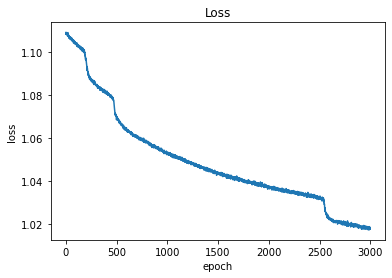

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')

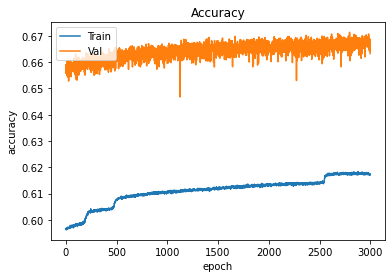

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

In [29]:
model_ckpt3.save("D:/User/Fabio/dl4g-jass-bot/models/cards_trick_model10000_06610")

INFO:tensorflow:Assets written to: D:/User/Fabio/dl4g-jass-bot/models/cards_trick_model10000_06610\assets


# Predict

In [15]:
def deal_random_hand() -> np.ndarray:
    """
    Deal random hand.

    Returns:
        one hot encoded 1x36 array
    """
    # shuffle card ids
    cards = np.arange(0, 36, dtype=np.int32)
    np.random.shuffle(cards)
    hands = np.zeros(shape=[4, 36], dtype=np.int32)

    # convert to one hot encoded
    hands[0, cards[0:9]] = 1
    hands[1, cards[9:18]] = 1
    hands[2, cards[18:27]] = 1
    hands[3, cards[27:39]] = 1
    
    hand = np.append(hands[0], np.random.randint(0,5))

    return hand

In [16]:
hand = deal_random_hand()
#hand = np.array([[0,1,1,1,0,1,0,0,0, 0,0,0,0,1,0,0,1,0, 1,0,0,0,0,0,0,0,0, 0,0,0,0,0,1,0,0,1, 4]])
hand_df = pd.DataFrame(data=[hand], columns=cards+trump)

print(hand_df)
print("\n")
input_hand = np.array([hand_df.iloc[0].values])
prediction = model.predict(input_hand)
prediction = prediction * hand[:-1]
result = pd.DataFrame(data=prediction, columns=cards)
print(result)
result.idxmax(axis=1)

   DA  DK  DQ  DJ  D10  D9  D8  D7  D6  HA  HK  HQ  HJ  H10  H9  H8  H7  H6  \
0   1   0   0   0    0   0   1   0   1   0   0   1   0    0   0   0   0   0   

   SA  SK  SQ  SJ  S10  S9  S8  S7  S6  CA  CK  CQ  CJ  C10  C9  C8  C7  C6  \
0   1   0   0   0    0   0   1   1   1   0   0   0   0    0   0   0   0   1   

   trump  
0      3  




ValueError: in user code:

    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 73 but received input with shape [None, 37]


In [18]:
model.save("D:/User/Fabio/dl4g-jass-bot/models/cards_trick_model10000_05633")

INFO:tensorflow:Assets written to: D:/User/Fabio/dl4g-jass-bot/models/cards_trick_model10000_05633\assets
